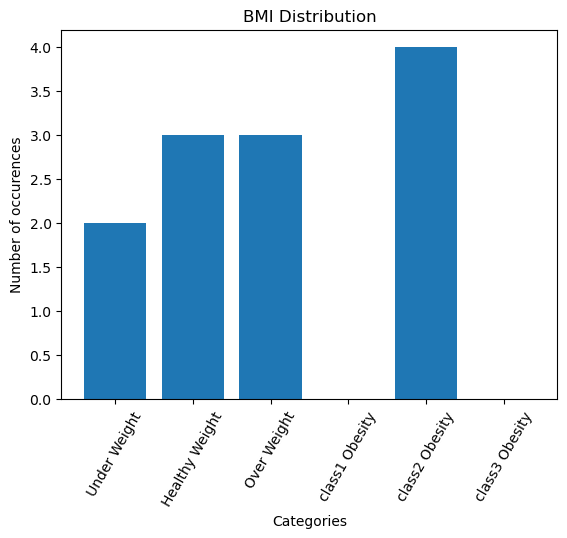

In [1]:
import tkinter as tk
import matplotlib.pyplot as plt

def calculate_BMI():
    label3.config(text="")
    label4.config(text="")
    label5.config(text="")
    try:
        height = float(searchbox1.get())
        weight = float(searchbox2.get())

        if height <= 0 or weight <= 0:
            label3.config(text="Height or weight cannot be negative")
        else:
            bmi = weight / (height*height)
            t = "Your BMI : "+ str(bmi)
            label4.config(text=t)
            category = ""
            
            if bmi < 18.5:
                category = "Under weight"
            elif bmi >= 18.5 and bmi <= 24.9:
                category = "Healthy weight"
            elif bmi >= 25.0 and bmi <= 29.9:
                category = "Over weight"
            elif bmi >= 30.0 and bmi <= 34.9:
                category = "class1 Obesity"
            elif bmi >= 35.0 and bmi <= 39.9:
                category = "class2 Obesity"
            else:
                category = "class3 Obesity"
                
            label5.config(text="Category : "+category)
            with open("bmi_data.txt", "a") as file:
                file.write(category+"\n")
    except:
        label3.config(text="Invalid input. Please enter valid numbers.")


def data_visualization():
    weight_counts = [0,0,0,0,0,0]
    weights = ["Under Weight", "Healthy Weight", "Over Weight", "class1 Obesity", "class2 Obesity", "class3 Obesity"]
    with open("bmi_data.txt", "r") as file:
        lines = file.readlines()
        for line in lines:
            l = line.replace("\n", "")
            if l == "Under weight":
                weight_counts[0] += 1
            elif l == "Healthy weight":
                weight_counts[1] += 1
            elif l == "Over weight":
                weight_counts[2] += 1
            elif l == "class1 Obesity":
                weight_counts[3] += 1
            elif l == "class2 Obesity":
                weight_counts[4] += 1
            elif l == "class3 Obesity":
                weight_counts[5] += 1
                
    plt.bar(weights, weight_counts)
    plt.title("BMI Distribution")
    plt.xlabel("Categories")
    plt.ylabel("Number of occurences")
    plt.xticks(rotation=60)
    
    plt.show()
    
window = tk.Tk()
window.title("BMI Calculator !!")

label1 = tk.Label(window, text="Enter your height in metres (m)")
label1.pack()

searchbox1 = tk.Entry(window, width = 20)
searchbox1.pack()

label2 = tk.Label(window, text="Enter your weight in kilograms (kg)")
label2.pack()

searchbox2 = tk.Entry(window, width = 20)
searchbox2.pack()

button = tk.Button(window, text="Calculate BMI", command = calculate_BMI)
button.pack()

button_2 = tk.Button(window, text="Data Visualization", command = data_visualization)
button_2.pack()

label3 = tk.Label(window, text="")
label3.pack()

label4 = tk.Label(window, text="")
label4.pack()

label5 = tk.Label(window, text="")
label5.pack()


window.mainloop()